In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data = pd.DataFrame()
data["income"] = df["Annual Income (k$)"]
data["spent"] = df["Spending Score (1-100)"]

In [5]:
from sklearn.cluster import KMeans

In [6]:
algo = KMeans(n_clusters=8 , init="k-means++" , random_state=42)

In [7]:
algo.fit(data)

KMeans(random_state=42)

In [8]:
algo.cluster_centers_  # return centroid points of all the clusters.

array([[ 55.36486486,  50.40540541],
       [108.18181818,  82.72727273],
       [ 78.89285714,  17.42857143],
       [ 25.72727273,  79.36363636],
       [ 24.58333333,   9.58333333],
       [ 78.03571429,  81.89285714],
       [ 31.53333333,  35.86666667],
       [109.7       ,  22.        ]])

In [9]:
algo.labels_  # returns its group label for each point ;

array([6, 3, 4, 3, 6, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 6, 3, 6, 3, 6, 3,
       4, 3, 4, 3, 6, 3, 6, 3, 4, 3, 4, 3, 4, 3, 4, 3, 6, 3, 6, 3, 6, 0,
       6, 3, 0, 6, 6, 6, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1,
       7, 1], dtype=int32)

**from above array we can observe that there are 8 unique labels because we have devided whole data into 8 groups. each cluster or group having more than 1 data point according to the minimum distance.**

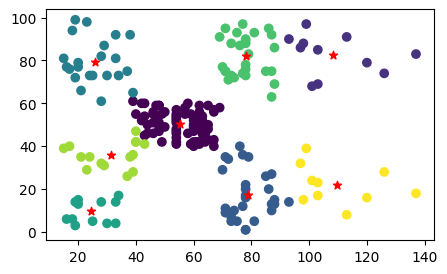

In [13]:
# graphical representation :
plt.figure(figsize=(5 , 3))
plt.scatter(x = data["income"] , y = data["spent"] , c=algo.labels_)  # Data points Group wise;
plt.scatter(x = algo.cluster_centers_[: , 0] , y = algo.cluster_centers_[: , 1] , color = "r" , marker = "*")  # centroids of each cluster.
plt.show()

#### **Now we need to find the best k-value or no of clusters**

to find best k-value we use WCSS method and ELBOW method(graphically)
actually in ELBOW method we use "inertia"
"inertia" is nothing but "WCSS" within cluster sum of squared distances.

Formula = sum(sum((x-mean)^2))

sum((x-mean)^2) sum of 1 cluster

sum(sum((x-mean)^2)) sum of all the clusters

In [14]:
k_values = [i for i in range(2,25)]
wcss = []
for i in k_values :
  algo = KMeans(n_clusters=i , init="k-means++" , random_state=42)
  algo.fit(data)
  wcss.append(algo.inertia_)

In [15]:
print(k_values)
print(wcss)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947, 33642.57922077922, 26686.837785187785, 24766.471609793436, 23103.122085983905, 18912.01248078515, 17425.00512987014, 15168.498192909192, 14466.207382661194, 12419.37562941444, 12620.355020126068, 11126.929648932937, 10209.237447786125, 9837.666019214694, 9071.334059507733, 7998.371212121212, 7176.443098568101, 6816.797644022646, 6501.38097735598]


#### **Visualization**

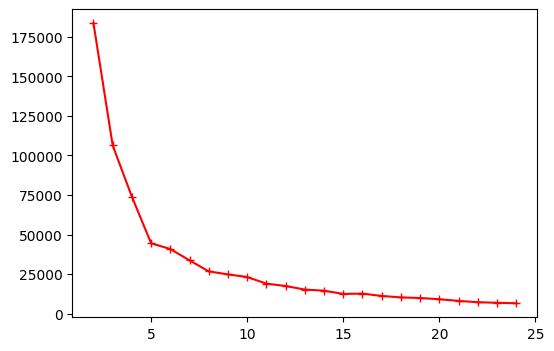

In [18]:
plt.figure(figsize=(6 , 4))
plt.plot(k_values , wcss , color = "r" , marker= "+")
plt.show()

**from above figure we can observe that the ELBOW point is at 5. so , 5 is the best k-value.**
that means for the best performance we need make whole data into 5 clusters.

In [19]:
algo = KMeans(n_clusters= 5 , init="k-means++" , random_state=42)
algo.fit(data)

KMeans(n_clusters=5, random_state=42)

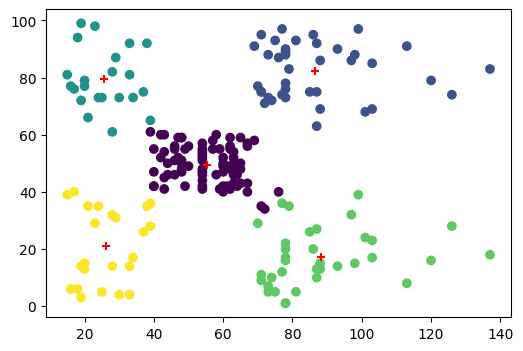

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(x = data["income"] , y =data["spent"] , c = algo.labels_)
plt.scatter(x = algo.cluster_centers_[: , 0] , y = algo.cluster_centers_[: , 1] , color = "r" , marker = "+")
plt.show()